## Tidal data

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import sys
import pandas as pd
import os


# North sea

In [2]:
# Define the longitude and latitude range for Europe
lon_min, lon_max = -11.5, 15.0  # Longitude range for Europe
lat_min, lat_max = 48, 65.0   # Latitude range for Europe

In [3]:
file_path = "/Users/lb962/Downloads/ESL/GESLA/data/processed/GESLA/interim/GESLA3_NorthSeaShort.nc"
# Open the dataset
GESLA_ns_dataset = xr.open_dataset(file_path)

In [4]:
# Filter dataset for the year 2014
filtered_ds = GESLA_ns_dataset.sel(date_time=(GESLA_ns_dataset['date_time'].dt.year == 2014))

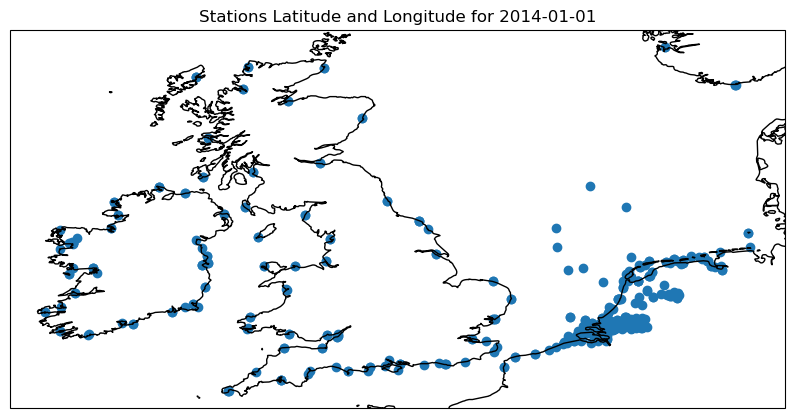

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Choose a specific date
chosen_date = '2014-01-01'  # Change this to your desired date

# Select data for the chosen date
filtered_ds_chosen_date = filtered_ds.sel(date_time=chosen_date)

# Create a Cartopy plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot latitude and longitude of stations for the chosen date
plt.scatter(filtered_ds_chosen_date.longitude, filtered_ds_chosen_date.latitude, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Stations Latitude and Longitude for {chosen_date}')

plt.show()

In [6]:
import numpy as np
# Assuming ns_data is your xarray Dataset
sea_level = filtered_ds["sea_level"]

# Set sea level values to NaN where they are below -1 or above 15
sea_level_filtered = sea_level.where((sea_level > -1) & (sea_level < 15), np.nan)
filtered_ds["q_sea_level"] = sea_level_filtered

In [7]:
GESLA = filtered_ds[["q_sea_level", "station", "latitude", "longitude"]].to_dataframe().reset_index()

In [8]:
GESLA = GESLA.dropna()
# Convert the index to datetime if it's not already
GESLA.index = pd.to_datetime(GESLA.index)

# Filter the DataFrame to include only hourly data
hourly_GESLA = GESLA[GESLA.index.hour == 0]  # Select data for every hour at 00:00

# Reset the index if needed
hourly_GESLA.reset_index(inplace=True)
hourly_GESLA = hourly_GESLA[["latitude", "station", "longitude", "date_time", "q_sea_level"]]

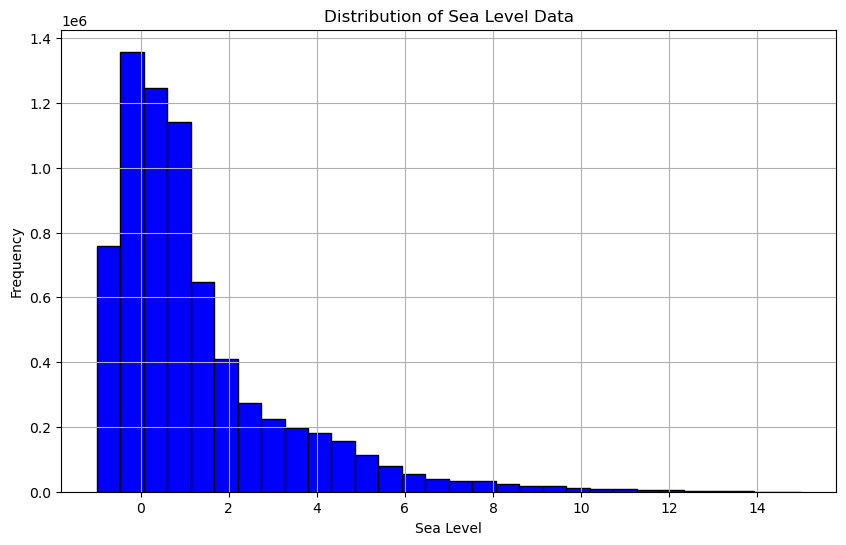

In [9]:
import matplotlib.pyplot as plt

# Assuming ns_data is your xarray Dataset and sea_level is your DataArray
sea_level_data = hourly_GESLA.q_sea_level.values.flatten()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(sea_level_data, bins=30, color='blue', edgecolor='black')
plt.xlabel('Sea Level')
plt.ylabel('Frequency')
plt.title('Distribution of Sea Level Data')
plt.grid(True)
plt.show()

# absolute monthly SL
https://prod-erddap.emodnet-physics.eu/erddap/griddap/EMODNET_CMCC_ASVL_DUAC_GLO_MONTHLYMAPS_v2022.html

In [11]:
EMODNET_file_ASL = "/Users/lb962/Downloads/ESL/GESLA/data/EMODNET_CMCC_ASVL_DUAC_GLO_MONTHLYMAPS_v2022_b468_4e5f_8654.nc"
EMODNET_ASL = xr.open_dataset(EMODNET_file_ASL)

chosen_date = '2014-08' 

filterd_ASL = EMODNET_ASL.sel(time=chosen_date)
hoi = filterd_ASL.to_dataframe()
hoi = hoi.reset_index()

# Extract latitude, longitude, and sea level anomaly (sla) data
latitude = hoi['latitude']
longitude = hoi['longitude']
sla = hoi['sla']

# Plot the sea level anomaly as a function of latitude and longitude
# Create a Cartopy plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Add coastlines
ax.coastlines()

plt.scatter(longitude, latitude, s=10, c = sla, cmap='viridis')
plt.colorbar(label='Sea Level Anomaly (sla)')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sea Level Anomaly (m) as a Function of Latitude and Longitude')
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lb962/Downloads/ESL/GESLA/data/EMODNET_CMCC_ASVL_DUAC_GLO_MONTHLYMAPS_v2022_b468_4e5f_8654.nc'

In [287]:
#EMODNET_ASL_df = EMODNET_ASL.to_dataframe().reset_index()
# Convert the index to a datetime index

# Assuming you want to start the numbering from 1000
start_index = 1000

# Create a new column named 'custom_index' and assign sequential numbers starting from start_index
hourly_GESLA['custom_index'] = range(start_index, start_index + len(hourly_GESLA))

# Set the 'custom_index' column as the index of the DataFrame
hourly_GESLA.set_index('custom_index', inplace=True)

sampled_hourly_GESLA = hourly_GESLA
sampled_hourly_GESLA.index = pd.to_datetime(sampled_hourly_GESLA.date_time)

# Resample to monthly intervals and calculate the mean for each month
monthly_sampled_hourly_GESLA = sampled_hourly_GESLA.resample('M').mean()

# Drop the "date_time" column
monthly_sampled_hourly_GESLA.drop("date_time", axis=1, inplace=True)

# Define the interval for resampling
interval = 0.25 # ERA 5 interval

monthly_sampled_hourly_GESLA = monthly_sampled_hourly_GESLA.reset_index()

# Round latitude and longitude values to the nearest interval
monthly_sampled_hourly_GESLA['latitude_rounded'] = np.round(monthly_sampled_hourly_GESLA['latitude'] / interval) * interval
monthly_sampled_hourly_GESLA['longitude_rounded'] = np.round(monthly_sampled_hourly_GESLA['longitude'] / interval) * interval

# Drop the original latitude and longitude columns if needed
monthly_sampled_hourly_GESLA.drop(columns=['latitude', 'longitude'], inplace=True)

# Rename the rounded columns to latitude and longitude
monthly_sampled_hourly_GESLA.rename(columns={'latitude_rounded': 'latitude', 'longitude_rounded': 'longitude'}, inplace=True)

In [288]:
monthly_sampled_hourly_GESLA

,date_time,q_sea_level,latitude,longitude
0,2014-01-31,1.526817,52.75,0.50
1,2014-02-28,1.548946,53.00,0.50
2,2014-03-31,1.436977,53.00,0.50
3,2014-04-30,1.377412,53.00,0.50
4,2014-05-31,1.372334,53.00,0.75
5,2014-06-30,1.301888,53.00,0.75
6,2014-07-31,1.341365,53.00,1.00
7,2014-08-31,1.101002,52.75,1.75
8,2014-09-30,1.053329,52.75,1.75
9,2014-10-31,1.128295,52.75,1.75


In [281]:
# Define the interval for resampling
interval = 0.25 # ERA 5 interval

EMODNET_ASL = EMODNET_ASL_df.reset_index()

# Round latitude and longitude values to the nearest interval
EMODNET_ASL['latitude_rounded'] = np.round(EMODNET_ASL['latitude'] / interval) * interval
EMODNET_ASL['longitude_rounded'] = np.round(EMODNET_ASL['longitude'] / interval) * interval

# Drop the original latitude and longitude columns if needed
EMODNET_ASL.drop(columns=['latitude', 'longitude'], inplace=True)

# Rename the rounded columns to latitude and longitude
EMODNET_ASL.rename(columns={'latitude_rounded': 'latitude', 'longitude_rounded': 'longitude'}, inplace=True)

In [289]:
EMODNET_ASL["date_time"] = EMODNET_ASL["time"]

# Assuming 'date_time' is the name of the column containing the dates
EMODNET_ASL['date_time'] = EMODNET_ASL['date_time'] + pd.offsets.MonthEnd()

In [291]:
# Proceed with the merge operation
ASL_merged_df = pd.merge(monthly_sampled_hourly_GESLA, EMODNET_ASL, on=['latitude', 'longitude', 'date_time'])

# Reset index if needed
ASL_merged_df.reset_index(drop=True, inplace=True)

In [292]:
ASL_merged_df

,date_time,q_sea_level,latitude,longitude,index,time,sla
0,2014-03-31,1.436977,53.0,0.5,24229,2014-03-16,0.0601
1,2014-03-31,1.436977,53.0,0.5,24230,2014-03-16,NaN
2,2014-03-31,1.436977,53.0,0.5,24336,2014-03-16,0.0394
3,2014-03-31,1.436977,53.0,0.5,24337,2014-03-16,0.0388
4,2014-07-31,1.341365,53.0,1.0,53763,2014-07-16,0.0155
5,2014-07-31,1.341365,53.0,1.0,53764,2014-07-16,0.0237
6,2014-07-31,1.341365,53.0,1.0,53870,2014-07-16,0.0149
7,2014-07-31,1.341365,53.0,1.0,53871,2014-07-16,0.0213


## †idal data

Try opening them all at once

In [17]:
import xarray as xr
import os

# Path to the tide NetCDF files
folder_path = "/Users/lb962/Downloads/ESL/GESLA/data/processed/CODEC/"

# List of .nc files in the folder
files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.nc')]

# Open each file individually and store them in a list
datasets = [xr.open_dataset(file) for file in files]

# Merge all datasets into a single dataset
merged_dataset = xr.merge(datasets)

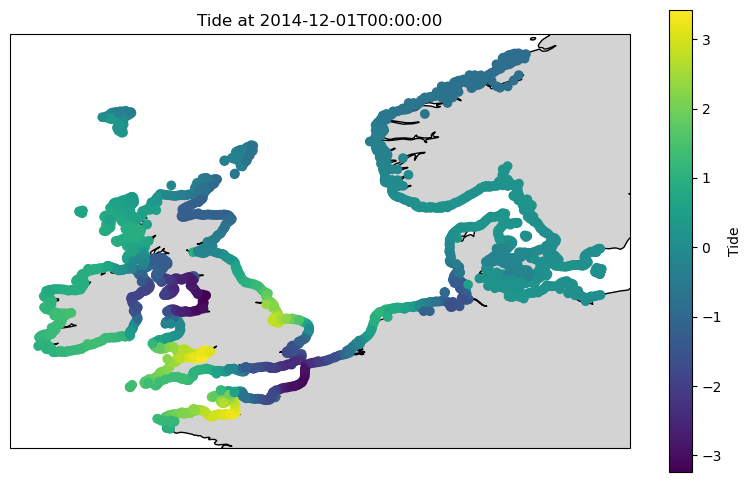

In [135]:
# Path to the NetCDF file
file_path = "/Users/lb962/Downloads/ESL/GESLA/data/processed/CODEC/2014tidesv2.nc"

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a Cartopy projection
projection = ccrs.PlateCarree()

# Open the NetCDF file
ds = xr.open_dataset(file_path)
tide = ds.to_dataframe()
tide_df = tide.reset_index()

# Select the data for the specific time
specific_time_data = ds.sel(time='2014-12-01T00:00:00.000000000')

# Create a new figure with Cartopy projection
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)

# Plot land
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

# Plot the 'tide' variable
sc = ax.scatter(specific_time_data['longitude'], specific_time_data['latitude'],
                c=specific_time_data['tide'], transform=projection)
plt.colorbar(sc, label='Tide')  # Add colorbar with label

# Set plot title and labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Tide at 2014-12-01T00:00:00')
plt.grid(True)
plt.show()

In [136]:
import xarray as xr

# List of file names for the six files
file_names = ['HAT', 'LAT', 'MHHW', 'MLLW', 'MSL', 'TR']

# List to store selected data
selected_datasets = []

# Loop over each file
for file_name in file_names:
    # Open the NetCDF file
    file_path = f"/Users/lb962/Downloads/ESL/GESLA/notebooks/feature_extraction/API_calls/CMIP6_50/historical_tide_actual-value_1985-2014_{file_name}_v1.nc"
    dataset = xr.open_dataset(file_path)
    
    # Rename station_y_coordinate to latitude and station_x_coordinate to longitude
    dataset = dataset.rename({'station_y_coordinate': 'latitude', 'station_x_coordinate': 'longitude'})
    
    # Extract longitude and latitude coordinates
    lon_values = dataset['longitude'].values
    lat_values = dataset['latitude'].values
    
    # Boolean indexing to select the desired range
    selected_indices = (lon_values >= lon_min) & (lon_values <= lon_max) & (lat_values >= lat_min) & (lat_values <= lat_max)
    
    # Select the data based on the indices
    selected_data = dataset.isel(stations=selected_indices)
    
    # Append selected data to the list
    selected_datasets.append(selected_data)

# Concatenate the datasets along the stations dimension
combined_dataset = xr.concat(selected_datasets, dim='stations')

# Convert the combined dataset to a DataFrame
df = combined_dataset.to_dataframe()
#df_reset = df.reset_index()
# Group the DataFrame by longitude and latitude and select the first value for each variable within each group
grouped_df = df.groupby(['longitude', 'latitude']).first().reset_index()
grouped_df

,longitude,latitude,HAT,LAT,MHHW,MLLW,MSL,TR
0,-11.484,61.992,1.132,-1.141,0.708,-0.657,0.016,1.365
1,-11.459,48.457,1.981,-1.899,1.250,-1.186,0.014,2.436
2,-11.426,49.980,2.005,-1.892,1.276,-1.195,0.015,2.471
3,-11.426,54.961,1.928,-1.862,1.213,-1.149,0.015,2.362
4,-11.426,57.012,1.820,-1.753,1.139,-1.066,0.016,2.205
...,...,...,...,...,...,...,...,...
5445,14.919,56.155,0.060,-0.070,0.035,-0.040,0.023,0.075
5446,14.927,55.232,0.056,-0.048,0.030,-0.024,0.024,0.054
5447,14.934,54.060,0.083,-0.068,0.054,-0.045,0.025,0.099
5448,14.985,54.741,0.058,-0.040,0.032,-0.023,0.024,0.055


In [317]:
# Merge the dataframes on latitude and longitude
tidal_data = pd.merge(tide_df, grouped_df, on=['latitude', 'longitude'], how='left')

In [318]:
tidal_data["date_time"] = tidal_data.time.copy()

In [319]:
# Assuming you want to start the numbering from 1000
start_index = 1000

# Create a new column named 'custom_index' and assign sequential numbers starting from start_index
hourly_GESLA['custom_index'] = range(start_index, start_index + len(hourly_GESLA))

# Set the 'custom_index' column as the index of the DataFrame
hourly_GESLA.set_index('custom_index', inplace=True)

# Define the interval for resampling
interval = 0.1 # ERA 5 interval

sampled_hourly_GESLA = hourly_GESLA.reset_index()

# Round latitude and longitude values to the nearest interval
sampled_hourly_GESLA['latitude_rounded'] = np.round(sampled_hourly_GESLA['latitude'] / interval) * interval
sampled_hourly_GESLA['longitude_rounded'] = np.round(sampled_hourly_GESLA['longitude'] / interval) * interval

# Drop the original latitude and longitude columns if needed
sampled_hourly_GESLA.drop(columns=['latitude', 'longitude'], inplace=True)

# Rename the rounded columns to latitude and longitude
sampled_hourly_GESLA.rename(columns={'latitude_rounded': 'latitude', 'longitude_rounded': 'longitude'}, inplace=True)

In [320]:
sampled_tidal_data = tidal_data.reset_index()
sampled_tidal_data["date_time"] = sampled_tidal_data.time

# Round latitude and longitude values to the nearest interval
sampled_tidal_data['latitude_rounded'] = np.round(sampled_tidal_data['latitude'] / interval) * interval
sampled_tidal_data['longitude_rounded'] = np.round(sampled_tidal_data['longitude'] / interval) * interval

# Drop the original latitude and longitude columns if needed
sampled_tidal_data.drop(columns=['latitude', 'longitude'], inplace=True)

# Rename the rounded columns to latitude and longitude
sampled_tidal_data.rename(columns={'latitude_rounded': 'latitude', 'longitude_rounded': 'longitude'}, inplace=True)

In [322]:
# Perform the merge
tidal_merged_df = pd.merge(sampled_hourly_GESLA, sampled_tidal_data, on=['date_time', 'longitude', 'latitude'], how='inner')

# If you want to reset the index after merging
tidal_merged_df.reset_index(drop=True, inplace=True)
tidal_merged_df.drop(columns=['latitude', 'longitude', 'time', 'custom_index',], inplace=True)
tidal_merged_df
tidal_merged_df = pd.merge(hourly_GESLA, tidal_merged_df, on=['q_sea_level', 'date_time'], how='inner')

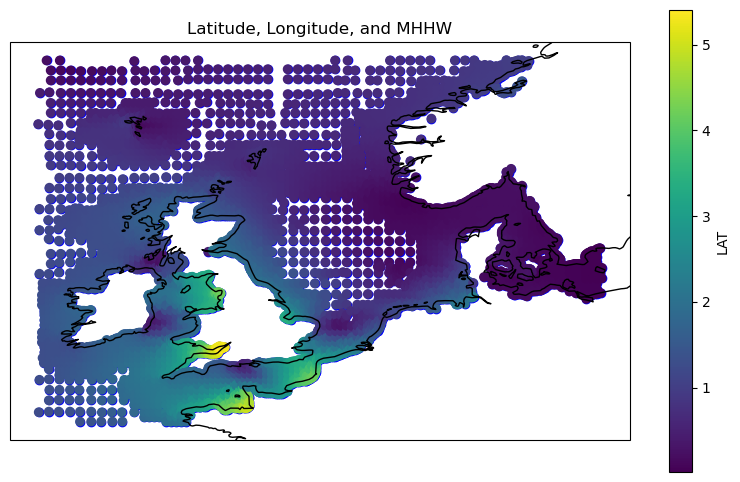

In [115]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
plt.figure(figsize=(10, 6))

# Create a Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot latitude and longitude
plt.scatter(grouped_df['longitude'], grouped_df['latitude'], color='blue', marker='o', transform=ccrs.PlateCarree())

# Plot LAT variable
# Adjust the size of the points based on the 'LAT' variable
sc = plt.scatter(grouped_df['longitude'], grouped_df['latitude'], c=grouped_df['MHHW'], cmap='viridis', marker='o', transform=ccrs.PlateCarree())

# Add colorbar with label
plt.colorbar(sc, label='LAT')

# Add coastlines
ax.coastlines()

# Set plot title and labels
plt.title('Latitude, Longitude, and MHHW')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

## Topographic knowledge

In [1]:
import xarray as xr
bathy_path = "/Users/lb962/Downloads/ESL/GESLA/data/processed/Topography/EMODNET_bath.nc"
bathy_ds = xr.open_dataset(bathy_path)

In [4]:
bathy_ds

<xarray.Dataset>
Dimensions:    (lat: 16320, lon: 25440)
Coordinates:
  * lon        (lon) float64 -11.5 -11.5 -11.5 -11.5 ... 15.0 15.0 15.0 15.0
  * lat        (lat) float64 48.0 48.0 48.0 48.0 48.0 ... 65.0 65.0 65.0 65.0
Data variables:
    elevation  (lat, lon) float32 ...
    slope      (lat, lon) float32 ...
    aspect     (lat, lon) float32 35.09 47.38 37.05 33.28 ... nan nan nan nan
    curvature  (lat, lon) float32 ...
Attributes:
    dtm_convention_version:  1.0
    Conventions:             SeaDataNet_1.0 CF1.6
    title:                   The EMODnet Grid
    institution:             On behalf of the EMODnet project, http://www.emo...
    source:                  source of the data can be found in the dataset o...
    references:              WORK IN PROGRESS 2020 lastest release is DOI: 10...
    comment:                 The data in the EMODnet Grid should not be used ...
    history:                 NetCDF file created with GGSgc NC_Makegrid versi...

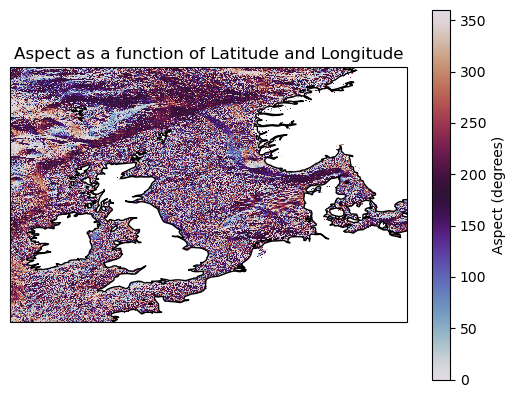

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a figure and axis with a PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the aspect data
aspect_plot = ax.pcolormesh(bathy_ds['lon'], bathy_ds['lat'], bathy_ds['aspect'], cmap='twilight')

# Add coastlines
ax.coastlines()

# Add a colorbar
cbar = plt.colorbar(aspect_plot, ax=ax, orientation='vertical')
cbar.set_label('Aspect (degrees)')

# Set plot title and labels
ax.set_title('Aspect as a function of Latitude and Longitude')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

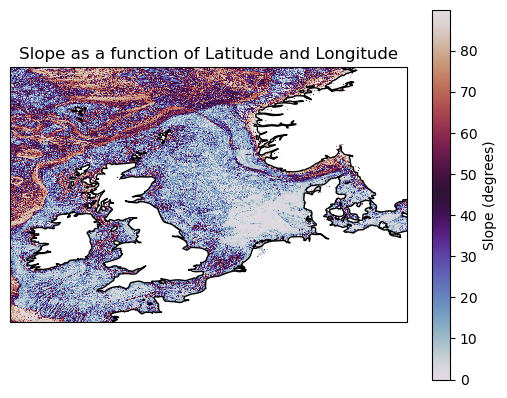

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a figure and axis with a PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the aspect data
aspect_plot = ax.pcolormesh(bathy_ds['lon'], bathy_ds['lat'], bathy_ds['slope'], cmap='twilight')

# Add coastlines
ax.coastlines()

# Add a colorbar
cbar = plt.colorbar(aspect_plot, ax=ax, orientation='vertical')
cbar.set_label('Slope (degrees)')

# Set plot title and labels
ax.set_title('Slope as a function of Latitude and Longitude')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a figure and axis with a PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the aspect data
aspect_plot = ax.pcolormesh(bathy_ds['lon'], bathy_ds['lat'], bathy_ds['curvature'], cmap='twilight')

# Add coastlines
ax.coastlines()

# Add a colorbar
cbar = plt.colorbar(aspect_plot, ax=ax, orientation='vertical')
cbar.set_label('curvature (degrees)')

# Set plot title and labels
ax.set_title('Curvature as a function of Latitude and Longitude')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

: 

In [135]:
import numpy as np

# Convert latitude and longitude coordinates to distances in meters
# You can use a library like geopy to calculate distances based on coordinates
# For simplicity, assuming a constant distance per degree of latitude and longitude
# Replace these values with actual conversions based on your dataset's geographic location
meters_per_degree_latitude = 111000  # Approximate value at equator
meters_per_degree_longitude = 111000  # Approximate value at equator

meters_per_degree_latitude = 1000 # Approximate value at equator
meters_per_degree_longitude = 1000  # Approximate value at equator

# Calculate gradients of elevation using numpy's gradient function
elevation = subset_bathy['elevation'].values
lon_distance = subset_bathy['lon'].values * meters_per_degree_longitude
lat_distance = subset_bathy['lat'].values * meters_per_degree_latitude

# Compute gradients along latitude and longitude directions
grad_elevation_lon = np.gradient(elevation, lon_distance, axis=1)
grad_elevation_lat = np.gradient(elevation, lat_distance, axis=0)

# Calculate slope using gradients
slope = np.sqrt(grad_elevation_lon**2 + grad_elevation_lat**2)

# Add the slope variable to the subset_bathy dataset
subset_bathy['slope'] = (('lat', 'lon'), slope)

# Now the subset_bathy dataset contains the 'slope' variable


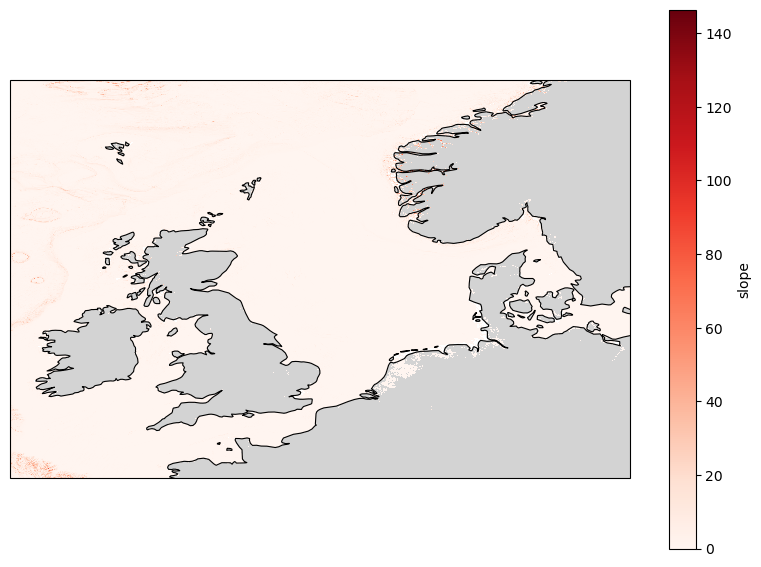

: 

In [136]:

# Plot the subset with coastlines and land mask
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_title('Subset of Bathymetry Data with Coastlines and Land Mask')

# Plot bathymetry on water only
subset_bathy['slope'].where(subset_bathy['elevation'] < 0).plot(ax=ax, cmap='Reds')

# Add coastlines
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)

# Add land mask
ax.add_feature(cfeature.LAND, color='lightgray')

# Show the plot
plt.show()

## ERA5

In [350]:
sampled_hourly_GESLA

,custom_index,date_time,q_sea_level,latitude,longitude
0,1000,2014-01-01 14:00:00,4.153,50.0,-5.5
1,1001,2014-01-02 14:00:00,2.688,50.0,-5.5
2,1002,2014-01-03 14:00:00,1.520,50.0,-5.5
3,1003,2014-01-04 14:00:00,0.964,50.0,-5.5
4,1004,2014-01-05 14:00:00,0.959,50.0,-5.5
...,...,...,...,...,...
295024,296024,2014-12-16 14:00:00,-0.665,53.5,-6.0
295025,296025,2014-12-21 14:00:00,-0.276,53.5,-6.0
295026,296026,2014-12-22 14:00:00,0.410,53.5,-6.0
295027,296027,2014-12-25 14:00:00,2.005,53.5,-6.0


In [363]:
filepath = "/Users/lb962/Downloads/ESL/GESLA/data/ERA5hourly/ERA52014.nc"
era5_2014 = xr.open_dataset(filepath)

era5_2014["date_time"] = era5_2014["time"].copy()

era5_2014_df = era5_2014.to_dataframe().reset_index().dropna()

# Extract the hour component from the 'date_time' column
hourly_GESLA['hour'] = hourly_GESLA['date_time'].dt.hour

# Filter hourly_GESLA for records occurring at 14:00
filtered_hourly_GESLA = hourly_GESLA[hourly_GESLA['hour'] == 14]

# Drop the 'hour' column as it's no longer needed
filtered_hourly_GESLA.drop(columns=['hour'], inplace=True)

# Assuming you want to start the numbering from 1000
start_index = 1000

# Create a new column named 'custom_index' and assign sequential numbers starting from start_index
filtered_hourly_GESLA['custom_index'] = range(start_index, start_index + len(filtered_hourly_GESLA))

# Set the 'custom_index' column as the index of the DataFrame
filtered_hourly_GESLA.set_index('custom_index', inplace=True)

# Define the interval for resampling
interval = 0.25 # ERA 5 interval

sampled_hourly_GESLA = filtered_hourly_GESLA.reset_index()

# Round latitude and longitude values to the nearest interval
sampled_hourly_GESLA['latitude_rounded'] = np.round(sampled_hourly_GESLA['latitude'] / interval) * interval
sampled_hourly_GESLA['longitude_rounded'] = np.round(sampled_hourly_GESLA['longitude'] / interval) * interval

# Drop the original latitude and longitude columns if needed
sampled_hourly_GESLA.drop(columns=['latitude', 'longitude'], inplace=True)

# Rename the rounded columns to latitude and longitude
sampled_hourly_GESLA.rename(columns={'latitude_rounded': 'latitude', 'longitude_rounded': 'longitude'}, inplace=True)

/var/folders/2b/rpgq1g5d5qz2nhbpj5s4jnrc0000gq/T/ipykernel_63576/734093248.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hourly_GESLA.drop(columns=['hour'], inplace=True)
/var/folders/2b/rpgq1g5d5qz2nhbpj5s4jnrc0000gq/T/ipykernel_63576/734093248.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hourly_GESLA['custom_index'] = range(start_index, start_index + len(filtered_hourly_GESLA))


In [367]:
import pandas as pd

# For era5_2014_df dataframe
min_lon_era5 = era5_2014_df['longitude'].min()
max_lon_era5 = era5_2014_df['longitude'].max()
min_lat_era5 = era5_2014_df['latitude'].min()
max_lat_era5 = era5_2014_df['latitude'].max()

# For sampled_hourly_GESLA dataframe
min_lon_GESLA = sampled_hourly_GESLA['longitude'].min()
max_lon_GESLA = sampled_hourly_GESLA['longitude'].max()
min_lat_GESLA = sampled_hourly_GESLA['latitude'].min()
max_lat_GESLA = sampled_hourly_GESLA['latitude'].max()

print("era5_2014_df:")
print("Minimum longitude:", min_lon_era5)
print("Maximum longitude:", max_lon_era5)
print("Minimum latitude:", min_lat_era5)
print("Maximum latitude:", max_lat_era5)

print("\nsampled_hourly_GESLA:")
print("Minimum longitude:", min_lon_GESLA)
print("Maximum longitude:", max_lon_GESLA)
print("Minimum latitude:", min_lat_GESLA)
print("Maximum latitude:", max_lat_GESLA)

era5_2014_df:
Minimum longitude: -11.5
Maximum longitude: 1.75
Minimum latitude: 57.0
Maximum latitude: 66.0

sampled_hourly_GESLA:
Minimum longitude: -10.0
Maximum longitude: 8.0
Minimum latitude: 50.0
Maximum latitude: 59.0


In [362]:
era5_2014_df.dropna()

,longitude,latitude,time,u10,v10,mdts,mpts,mwd,mwp,sst,shts,shww,sp,date_time
0,-11.50,66.0,2014-01-01 00:00:00,-9.632737,-7.493981,155.014374,10.966678,79.182869,9.098933,276.505829,2.765308,2.401061,99805.554688,2014-01-01 00:00:00
1,-11.50,66.0,2014-01-01 01:00:00,-9.729260,-7.537722,154.849564,11.061729,78.386322,9.133483,276.505829,2.792796,2.496818,99751.390625,2014-01-01 01:00:00
2,-11.50,66.0,2014-01-01 02:00:00,-9.891482,-7.945468,162.650269,11.275596,77.507362,9.165092,276.505829,2.737520,2.672909,99687.781250,2014-01-01 02:00:00
3,-11.50,66.0,2014-01-01 03:00:00,-10.460884,-8.135997,166.962631,11.390925,76.123009,9.178324,276.505829,2.708530,2.825752,99636.757812,2014-01-01 03:00:00
4,-11.50,66.0,2014-01-01 04:00:00,-11.066787,-8.069275,177.790237,11.601306,74.436516,9.159211,276.505829,2.574846,3.086782,99589.578125,2014-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34111435,1.75,60.0,2014-12-31 19:00:00,4.629073,7.784643,318.021729,4.277579,301.563965,3.520036,281.183014,0.391138,0.491906,101347.468750,2014-12-31 19:00:00
34111436,1.75,60.0,2014-12-31 20:00:00,4.866730,7.941812,320.241089,4.360591,302.404480,3.597711,281.183014,0.415922,0.492596,101296.093750,2014-12-31 20:00:00
34111437,1.75,60.0,2014-12-31 21:00:00,4.917018,8.099720,321.367249,4.380552,302.201233,3.652353,281.183014,0.442209,0.495358,101266.742188,2014-12-31 21:00:00
34111438,1.75,60.0,2014-12-31 22:00:00,4.303005,8.697254,324.267761,4.498099,302.234192,3.703075,281.205627,0.420429,0.550833,101190.906250,2014-12-31 22:00:00


In [357]:
sampled_hourly_GESLA

,custom_index,date_time,q_sea_level,latitude,longitude
0,1000,2014-01-01 14:00:00,4.153,50.0,-5.5
1,1001,2014-01-02 14:00:00,2.688,50.0,-5.5
2,1002,2014-01-03 14:00:00,1.520,50.0,-5.5
3,1003,2014-01-04 14:00:00,0.964,50.0,-5.5
4,1004,2014-01-05 14:00:00,0.959,50.0,-5.5
...,...,...,...,...,...
295024,296024,2014-12-16 14:00:00,-0.665,53.5,-6.0
295025,296025,2014-12-21 14:00:00,-0.276,53.5,-6.0
295026,296026,2014-12-22 14:00:00,0.410,53.5,-6.0
295027,296027,2014-12-25 14:00:00,2.005,53.5,-6.0


In [364]:
# Perform the merge
merged_df = pd.merge(sampled_hourly_GESLA, era5_2014_df, on=['date_time', 'longitude', 'latitude'], how='inner')

# If you want to reset the index after merging
merged_df.reset_index(drop=True, inplace=True)
merged_df.drop(columns=['latitude', 'longitude', 'date_time'], inplace=True)

final_ds = pd.merge(sampled_hourly_GESLA, merged_df, on=['custom_index', 'q_sea_level'], how='inner')
final_ds.drop(columns=['time'], inplace=True)

In [372]:
final_ds.drop(["longitude", "latitude", 'custom_index'], axis=1, inplace=True)
final_dsv = pd.merge(filtered_hourly_GESLA, final_ds, on = ['date_time','q_sea_level'])

In [373]:
final_dsv 

,latitude,longitude,date_time,q_sea_level,u10,v10,mdts,mpts,mwd,mwp,sst,shts,shww,sp
0,58.000000,7.567000,2014-08-27 14:00:00,1.021,-5.528502,1.651398,53.671074,4.563051,55.533493,4.414404,286.198456,0.517012,0.122229,100250.445312
1,58.457199,-5.049600,2014-08-27 14:00:00,1.021,-5.528502,1.651398,53.671074,4.563051,55.533493,4.414404,286.198456,0.517012,0.122229,100250.445312
2,51.707389,-5.051778,2014-07-18 14:00:00,3.408,-6.598361,1.711447,62.125504,3.768103,62.493713,3.731744,286.585632,0.387984,0.036830,100535.976562
3,58.457199,-5.049600,2014-07-18 14:00:00,3.408,-6.598361,1.711447,62.125504,3.768103,62.493713,3.731744,286.585632,0.387984,0.036830,100535.976562
4,52.013222,-4.983750,2014-09-25 14:00:00,1.077,6.711202,7.144853,309.353027,4.548160,269.196472,3.389189,285.917419,0.313932,0.440574,99434.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,58.457199,-5.049600,2014-10-27 14:00:00,1.728,6.951291,5.808928,218.007843,4.159399,201.868500,3.399970,284.741547,0.308224,0.540245,98686.171875
712,58.457199,-5.049600,2014-10-28 14:00:00,2.230,7.459048,-0.864768,198.198441,4.613428,191.463882,3.880234,284.491882,0.332257,0.797131,99268.757812
713,58.457199,-5.049600,2014-10-29 14:00:00,2.702,2.825968,0.795872,259.016479,3.900858,259.011566,3.900816,284.438812,0.417574,0.000000,100505.218750
714,58.457199,-5.049600,2014-11-17 14:00:00,3.476,-7.016085,1.661035,50.276123,6.406735,69.618744,5.570222,284.062225,0.357792,0.272769,100138.265625


# Old ERA5

In [334]:
ERA5 = pd.read_pickle("/Users/lb962/Downloads/ESL/GESLA/data/processed/ERA5/14h1-14.pkl")

ERA5["date_time"] = ERA5["time"].copy()

In [344]:
import pandas as pd

# Assuming 'date_time' is a datetime column in hourly_GESLA
# Extract the hour component from the 'date_time' column
hourly_GESLA['hour'] = hourly_GESLA['date_time'].dt.hour

# Filter hourly_GESLA for records occurring at 14:00
filtered_hourly_GESLA = hourly_GESLA[hourly_GESLA['hour'] == 14]

# Drop the 'hour' column as it's no longer needed
filtered_hourly_GESLA.drop(columns=['hour'], inplace=True)

/var/folders/2b/rpgq1g5d5qz2nhbpj5s4jnrc0000gq/T/ipykernel_63576/4265494742.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hourly_GESLA.drop(columns=['hour'], inplace=True)


In [336]:
# Assuming you want to start the numbering from 1000
start_index = 1000

# Create a new column named 'custom_index' and assign sequential numbers starting from start_index
filtered_hourly_GESLA['custom_index'] = range(start_index, start_index + len(filtered_hourly_GESLA))

# Set the 'custom_index' column as the index of the DataFrame
filtered_hourly_GESLA.set_index('custom_index', inplace=True)

# Define the interval for resampling
interval = 0.25 # ERA 5 interval

sampled_hourly_GESLA = filtered_hourly_GESLA.reset_index()

# Round latitude and longitude values to the nearest interval
sampled_hourly_GESLA['latitude_rounded'] = np.round(sampled_hourly_GESLA['latitude'] / interval) * interval
sampled_hourly_GESLA['longitude_rounded'] = np.round(sampled_hourly_GESLA['longitude'] / interval) * interval

# Drop the original latitude and longitude columns if needed
sampled_hourly_GESLA.drop(columns=['latitude', 'longitude'], inplace=True)

# Rename the rounded columns to latitude and longitude
sampled_hourly_GESLA.rename(columns={'latitude_rounded': 'latitude', 'longitude_rounded': 'longitude'}, inplace=True)

# Perform the merge
merged_df = pd.merge(sampled_hourly_GESLA, ERA5, on=['date_time', 'longitude', 'latitude'], how='inner')

# If you want to reset the index after merging
merged_df.reset_index(drop=True, inplace=True)
merged_df.drop(columns=['latitude', 'longitude', 'date_time'], inplace=True)

final_ds = pd.merge(sampled_hourly_GESLA, merged_df, on=['custom_index', 'q_sea_level'], how='inner')
final_ds.drop(columns=['time'], inplace=True)

/var/folders/2b/rpgq1g5d5qz2nhbpj5s4jnrc0000gq/T/ipykernel_63576/4179372856.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hourly_GESLA['custom_index'] = range(start_index, start_index + len(filtered_hourly_GESLA))


In [337]:
final_ds.drop(["longitude", "latitude", 'custom_index'], axis=1, inplace=True)
final_dsv = pd.merge(filtered_hourly_GESLA, final_ds, on = ['date_time','q_sea_level'])

# merge all

In [375]:
fianlll

,latitude,longitude,date_time,q_sea_level,u10,v10,mdts,mpts,mwd,mwp,...,sp,index,stations,tide,HAT,LAT,MHHW,MLLW,MSL,TR
0,58.000000,7.5670,2014-08-27 14:00:00,1.021,-5.528502,1.651398,53.671074,4.563051,55.533493,4.414404,...,100250.445312,9351837,5323,0.111167,0.217,-0.249,0.152,-0.158,0.023,0.310
1,58.000000,7.5670,2014-08-27 14:00:00,1.021,-5.528502,1.651398,53.671074,4.563051,55.533493,4.414404,...,100250.445312,9352320,39074,0.112000,0.213,-0.247,0.149,-0.156,0.023,0.305
2,58.000000,7.5670,2014-08-27 14:00:00,1.021,-5.528502,1.651398,53.671074,4.563051,55.533493,4.414404,...,100250.445312,9352544,40495,0.112000,0.213,-0.247,0.149,-0.156,0.023,0.305
3,58.000000,7.5670,2014-08-27 14:00:00,1.021,-5.528502,1.651398,53.671074,4.563051,55.533493,4.414404,...,100250.445312,9351028,1745,-1.825833,2.513,-2.702,1.580,-1.652,0.002,3.232
4,58.457199,-5.0496,2014-08-27 14:00:00,1.021,-5.528502,1.651398,53.671074,4.563051,55.533493,4.414404,...,100250.445312,9351837,5323,0.111167,0.217,-0.249,0.152,-0.158,0.023,0.310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,58.457199,-5.0496,2014-10-27 14:00:00,1.728,6.951291,5.808928,218.007843,4.159399,201.868500,3.399970,...,98686.171875,3624580,1745,-1.437833,2.513,-2.702,1.580,-1.652,0.002,3.232
1259,58.457199,-5.0496,2014-10-28 14:00:00,2.230,7.459048,-0.864768,198.198441,4.613428,191.463882,3.880234,...,99268.757812,3687508,1745,-0.827500,2.513,-2.702,1.580,-1.652,0.002,3.232
1260,58.457199,-5.0496,2014-10-29 14:00:00,2.702,2.825968,0.795872,259.016479,3.900858,259.011566,3.900816,...,100505.218750,3750436,1745,-0.095167,2.513,-2.702,1.580,-1.652,0.002,3.232
1261,58.457199,-5.0496,2014-11-17 14:00:00,3.476,-7.016085,1.661035,50.276123,6.406735,69.618744,5.570222,...,100138.265625,6833908,1745,0.623833,2.513,-2.702,1.580,-1.652,0.002,3.232


In [374]:
fianlll = pd.merge(final_dsv, tidal_merged_df, on = ['date_time', 'q_sea_level', "longitude", "latitude"])

In [ ]:
("/Users/lb962/Downloads/ESL/GESLA/data/ml_ready/Northsea14h.pkl"

In [376]:
fianlll.to_pickle("/Users/lb962/Downloads/ESL/GESLA/data/ml_ready/Northseahourly.pkl")